# Elections

In [134]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium

### Parcer

In [135]:
def get_data(url):
    page=pd.read_html(url,encoding='CP1251')
    header=page[6].drop(12).T
    header=header.iloc[1]
    header[0]='Номер УИК'
    data=page[7].drop(12).T
    data.columns=header
    data.reset_index()
    return data

def to_numeric(data):
    data.iloc[:,0]=[int(i.split()[1][1:]) for i in data.iloc[:,0]]
    for i in range(1,12):
        data.iloc[:,i]=pd.to_numeric(data.iloc[:,i])
    for i in range(12,15):
        l=[]
        perc=[]
        for a in data.iloc[:,i]:
            a=a.split()
            l.append(int(a[0]))
            perc.append(float(a[1][:-2]))
        data.iloc[:,i]=l
        data['% за '+str(data.columns.values[i])]=perc
    return data

In [136]:
url='http://www.st-petersburg.vybory.izbirkom.ru/region/region/st-petersburg?action=show&root=178401412&tvd=27820001217430&vrn=27820001217413&region=78&global=&sub_region=78&prver=0&pronetvd=null&vibid=27820001217430&type=222'

data=get_data(url)
data=to_numeric(data)
turnout = round(((data.iloc[:,3] + data.iloc[:,4])*100/data.iloc[:,1]), 2)
data['Явка, %'] =turnout

In [137]:
data["Явка"] = ((data["Число избирательных бюллетеней, выданных избирателям в помещении для голосования в день голосования"] 
                + data["Число избирательных бюллетеней, выданных избирателям, проголосовавшим вне помещения для голосования"])
                /data["Число избирателей, внесенных в список избирателей на момент окончания голосования"])

In [138]:
data

1,Номер УИК,"Число избирателей, внесенных в список избирателей на момент окончания голосования","Число избирательных бюллетеней, полученных участковой избирательной комиссией","Число избирательных бюллетеней, выданных избирателям в помещении для голосования в день голосования","Число избирательных бюллетеней, выданных избирателям, проголосовавшим вне помещения для голосования",Число погашенных избирательных бюллетеней,"Число избирательных бюллетеней, содержащихся в переносных ящиках для голосования","Число избирательных бюллетеней, содержащихся в стационарных ящиках для голосования",Число недействительных избирательных бюллетеней,Число действительных избирательных бюллетеней,Число утраченных избирательных бюллетеней,"Число избирательных бюллетеней, не учтенных при получении",Амосов Михаил Иванович,Беглов Александр Дмитриевич,Тихонова Надежда Геннадьевна,% за Амосов Михаил Иванович,% за Беглов Александр Дмитриевич,% за Тихонова Надежда Геннадьевна,"Явка, %",Явка
0,1724,1046,1000,378,27,595,27,377,15,389,0,0,64,266,59,15.8,65.8,14.6,38.72,0.387189
1,1725,1222,1000,447,11,542,11,447,21,437,0,0,79,279,79,17.2,60.9,17.2,37.48,0.374795
2,1726,1956,1600,777,5,818,5,777,12,770,0,0,149,401,220,19.0,51.2,28.1,39.98,0.399796
3,1727,1945,1600,538,1,1061,1,538,10,529,0,0,118,257,154,21.8,47.6,28.5,27.71,0.277121
4,1729,1180,1000,596,21,383,21,586,13,594,0,0,105,401,88,17.3,66.0,14.5,52.29,0.522881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,1783,2142,2000,657,2,1341,2,657,18,641,0,0,149,392,100,22.6,59.4,15.1,30.77,0.307656
59,1784,1930,1600,506,3,1091,3,506,8,501,0,0,109,299,93,21.4,58.7,18.2,26.37,0.263731
60,1785,2012,1800,527,4,1269,4,527,10,521,0,0,115,303,103,21.6,57.0,19.4,26.39,0.263917
61,1786,1889,1600,405,7,1188,7,405,8,404,0,0,83,248,73,20.1,60.1,17.7,21.81,0.218105


### Graphic Visualisation

Text(0.5, 1.0, 'Зависимость % голосов за кандидата от явки')

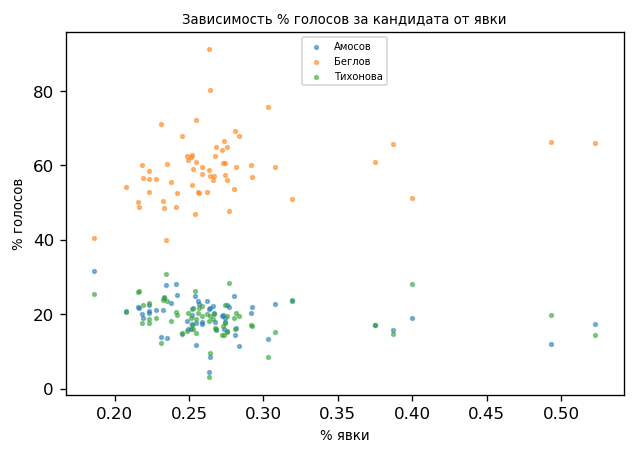

In [139]:
width_in_inches = 6
height_in_inches = 4
dots_per_inch = 120

plt.figure(figsize=(width_in_inches, height_in_inches), dpi=dots_per_inch)
plt.scatter(data["Явка"], data["% за Амосов Михаил Иванович"], alpha=0.5, s = 5)
plt.scatter(data["Явка"], data["% за Беглов Александр Дмитриевич"], alpha=0.5, s = 5)
plt.scatter(data["Явка"], data["% за Тихонова Надежда Геннадьевна"], alpha=0.5, s = 5)
plt.xlabel('% явки', fontsize=8)
plt.ylabel('% голосов', fontsize=8)
plt.legend(["Амосов", "Беглов", "Тихонова"], loc='upper center', fontsize=6)
plt.title('Зависимость % голосов за кандидата от явки', fontsize=8)

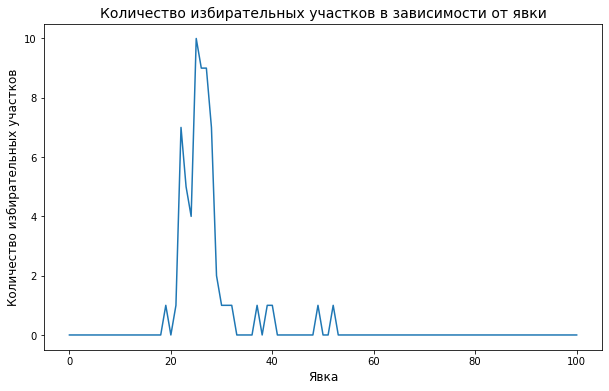

In [140]:
#количество избирательных участков в зависимости от явки
count = np.array([])
for i in range(101):
  count = np.append(count, 0)
for i in turnout:
    for j in range(101):
        if(((j - 0.5) < i) & (i <= (j + 0.5))):
            count[j] +=1

plt.figure(figsize=(10, 6))
plt.plot(count)
plt.ylabel('Количество избирательных участков', fontsize=12)
plt.xlabel('Явка', fontsize=12)
plt.title('Количество избирательных участков в зависимости от явки', fontsize=14)
plt.show()

### Map Visualisation

In [141]:
data = pd.read_csv("datamap.csv")
map = folium.Map(location = [60, 30.2], zoom_start = 12)

x = data.iloc[:, 2]
y = data.iloc[:, 3]
vote1 = data.iloc[:, 4]
vote2 = data.iloc[:, 5]
vote3 = data.iloc[:, 6]
per1 = data.iloc[:, 8]
per2 = data.iloc[:, 9]
per3 = data.iloc[:, 10]

for x, y, vote1, vote2, vote3, per1, per2, per3 in zip(x, y, vote1, vote2, vote3, per1, per2, per3):
    if per1 > per2 and per1 > per3:
        circlecolor="blue"
    elif per2 > per1 and per2 > per3:
        circlecolor="orange"
    else:
        circlecolor="green"
    folium.CircleMarker(location = [x,y], radius = 8, fill=True, color=circlecolor, tooltip = str(vote1) + " (" + str(per1) + "%) For Amosov; \n" + str(vote2) + " (" + str(per2) + "%) For Beglov; \n" + str(vote3) + " (" + str(per3) + "%) For Tikhonova.").add_to(map)
map.save("map.html")
map